In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

%load_ext cuml.accel

[2025-04-14 11:52:57.074] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-04-14 11:53:21.664] [CUML] [info] cuML: Installed accelerator for umap.
[2025-04-14 11:53:21.725] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-04-14 11:53:21.725] [CUML] [info] cuML: Successfully initialized accelerator.


In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/mujahidashraf/data/refs/heads/main/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.drop(["date", "id"], axis=1, inplace=True)

In [ ]:
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.isna().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0


In [ ]:
#for col in data.columns:
    #.figure(figsize=(20,9))
    #sns.histplot(data[col], color="mediumspringgreen")
    #plt.show()

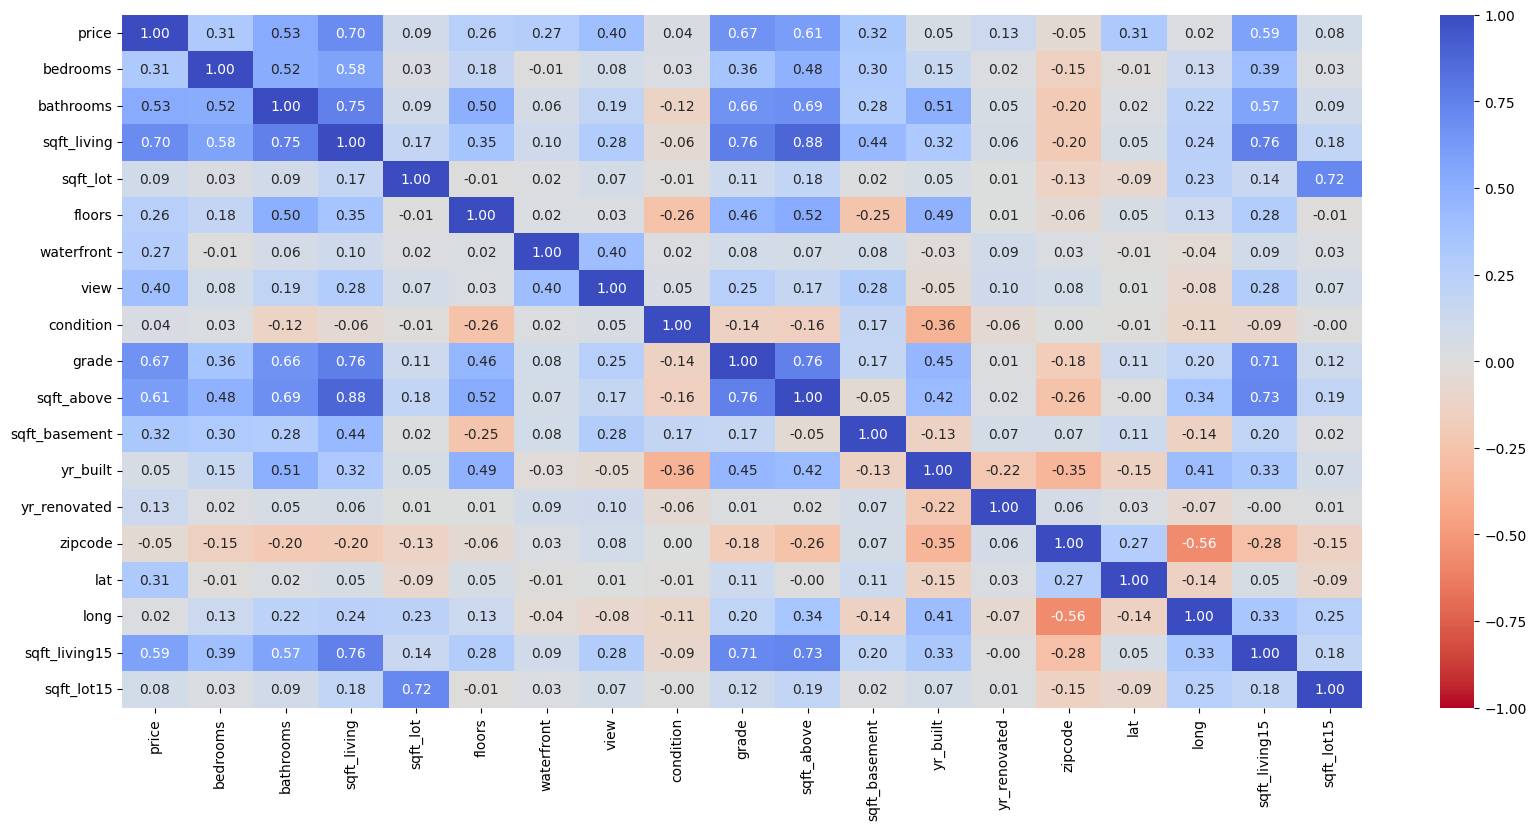

In [ ]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(), cmap="coolwarm_r", vmin=-1, annot=True, fmt=".2f")
plt.show()

In [ ]:
rs = RobustScaler()
data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)

In [ ]:
%%time
dbscan = DBSCAN(eps=1.2, min_samples=10,metric='euclidean')
dbscan.fit(data)
print("")


CPU times: user 1.42 s, sys: 6.98 ms, total: 1.43 s
Wall time: 1.43 s


In [ ]:
labels=dbscan.labels_

In [ ]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1,  1,  4,  2,  7, 10,  6,  5, 12,  8,  3, 11,  9])

In [ ]:
len(set(labels))

14

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: ' + str(n_clusters_))
print('Estimated number of noise points: ' + str(n_noise_))

Estimated number of clusters: 13
Estimated number of noise points: 7942


In [ ]:

eps_values = np.arange(1.75,3,0.25)
min_samples = np.arange(12,17)
print(eps_values)
print(min_samples)
DBSCAN_params = list(product(eps_values, min_samples))
print(DBSCAN_params)

[1.75 2.   2.25 2.5  2.75]
[12 13 14 15 16]
[(np.float64(1.75), np.int64(12)), (np.float64(1.75), np.int64(13)), (np.float64(1.75), np.int64(14)), (np.float64(1.75), np.int64(15)), (np.float64(1.75), np.int64(16)), (np.float64(2.0), np.int64(12)), (np.float64(2.0), np.int64(13)), (np.float64(2.0), np.int64(14)), (np.float64(2.0), np.int64(15)), (np.float64(2.0), np.int64(16)), (np.float64(2.25), np.int64(12)), (np.float64(2.25), np.int64(13)), (np.float64(2.25), np.int64(14)), (np.float64(2.25), np.int64(15)), (np.float64(2.25), np.int64(16)), (np.float64(2.5), np.int64(12)), (np.float64(2.5), np.int64(13)), (np.float64(2.5), np.int64(14)), (np.float64(2.5), np.int64(15)), (np.float64(2.5), np.int64(16)), (np.float64(2.75), np.int64(12)), (np.float64(2.75), np.int64(13)), (np.float64(2.75), np.int64(14)), (np.float64(2.75), np.int64(15)), (np.float64(2.75), np.int64(16))]


In [ ]:

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(data, DBS_clustering.labels_))
    print(p)
    print(len(np.unique(DBS_clustering.labels_)))
    print(silhouette_score(data, DBS_clustering.labels_))
    print('_'*100)

(np.float64(1.75), np.int64(12))
5
-0.057211622033460585
____________________________________________________________________________________________________
(np.float64(1.75), np.int64(13))
4
-0.06374840632291182
____________________________________________________________________________________________________
(np.float64(1.75), np.int64(14))
5
-0.07243987748563933
____________________________________________________________________________________________________
(np.float64(1.75), np.int64(15))
3
-0.017085250969697322
____________________________________________________________________________________________________
(np.float64(1.75), np.int64(16))
3
-0.024035093645963936
____________________________________________________________________________________________________
(np.float64(2.0), np.int64(12))
3
0.693760587405944
____________________________________________________________________________________________________
(np.float64(2.0), np.int64(13))
3
0.6890851267538668
______

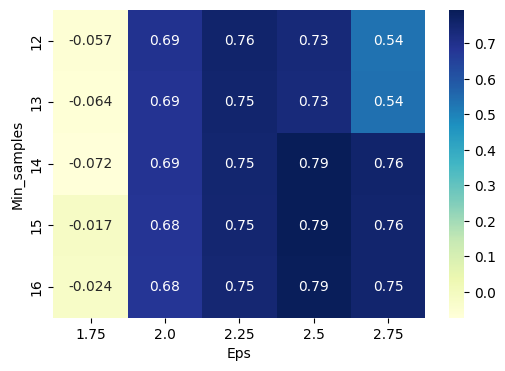

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=2.5, min_samples=14).fit(data)

DBSCAN_clustered = data.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2122
0,19273
1,24
2,118
3,46
4,21
5,9


##lefted

In [ ]:
tsne = TSNE()
tsne_data = tsne.fit_transform(data)

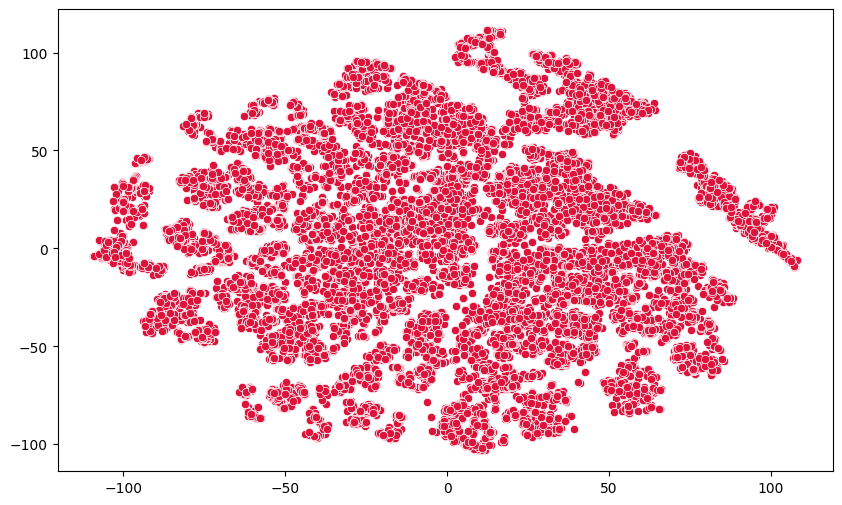

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], color="crimson")
plt.show()

In [ ]:
dbscan = DBSCAN(3.5, min_samples=55).fit(tsne_data)

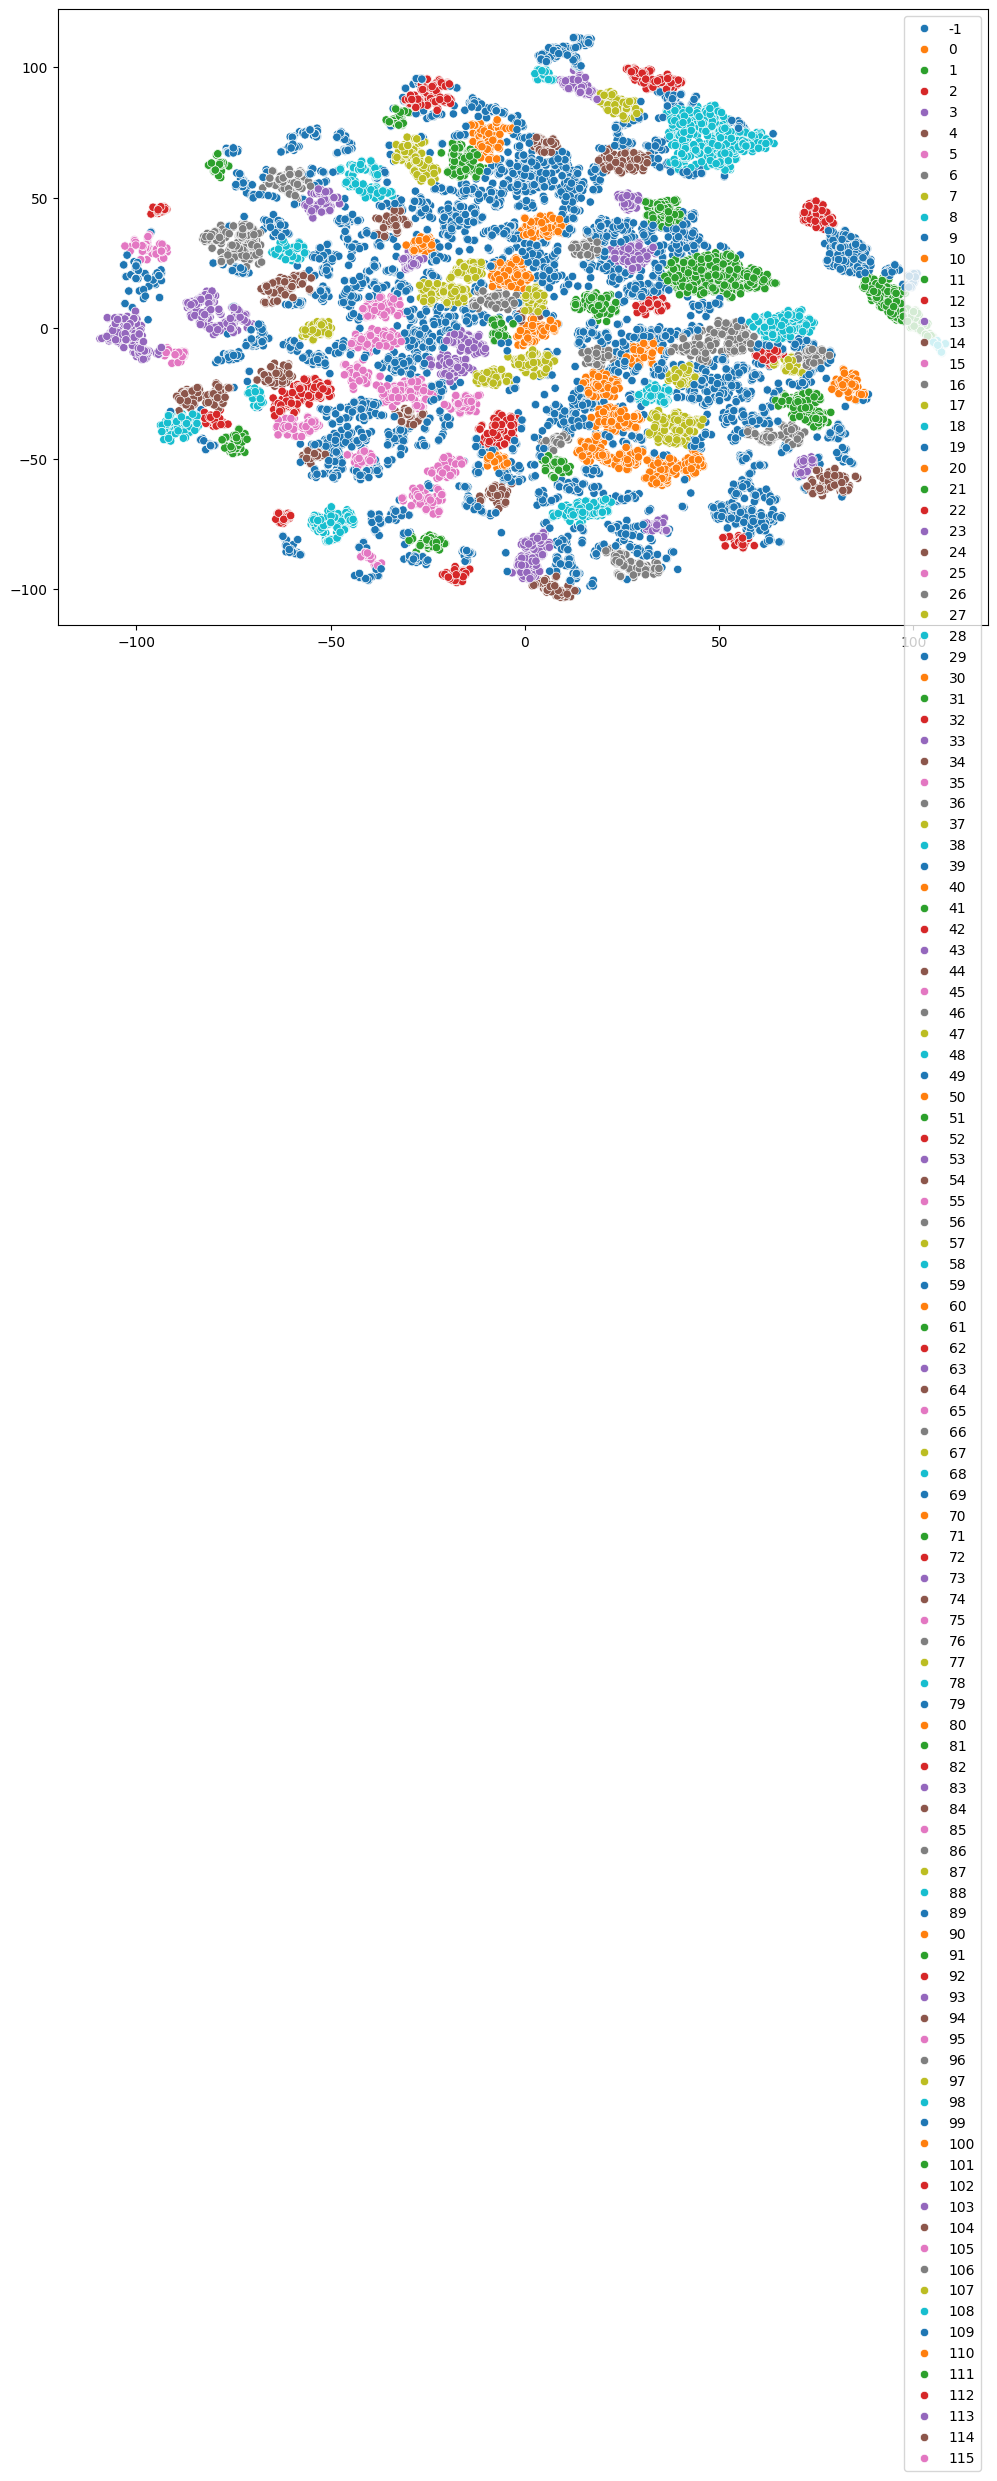

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()

##umap

In [ ]:
from umap import UMAP
umap = UMAP(random_state=42)
embedding = umap.fit_transform(data)

[2025-04-14 12:03:00.927] [CUML] [info] build_algo set to brute_force_knn because random_state is given


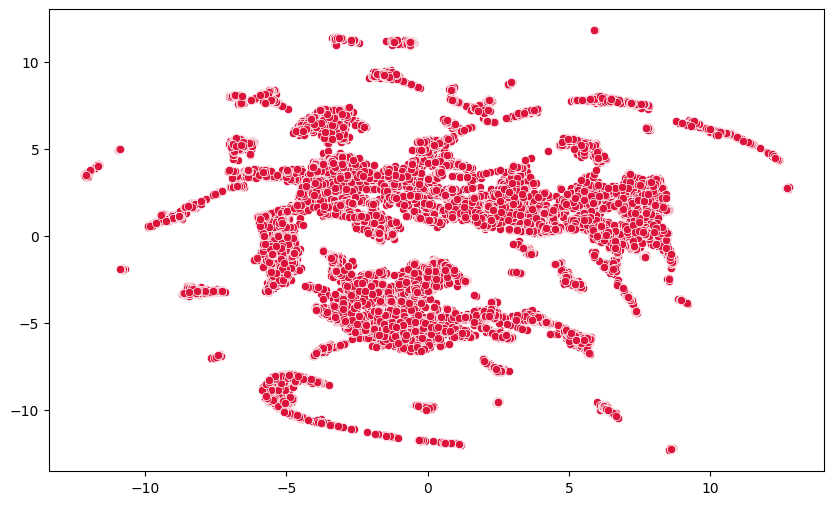

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], color="crimson")
plt.show()

In [ ]:
dbscan = DBSCAN(0.6, min_samples=55).fit(embedding)

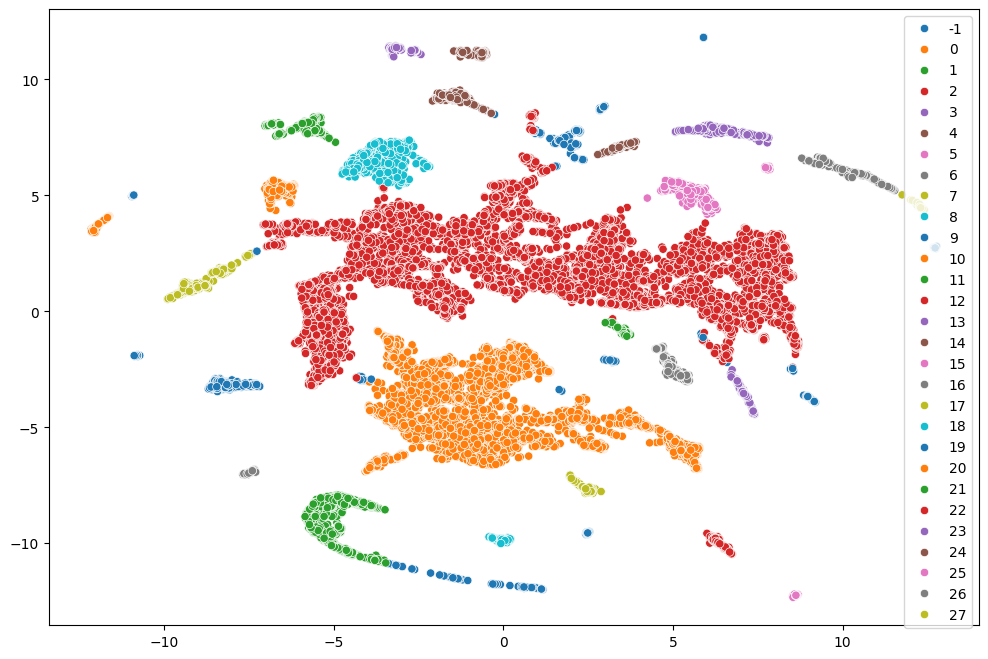

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()

In [ ]:
cluster_labels = pd.Series(dbscan.labels_)
cluster_labels.value_counts()

,count
2,9631
0,5474
8,784
1,660
5,495
7,468
9,430
-1,406
6,320
10,293


In [ ]:
for i in [14, 13,15]:
    cluster_labels[cluster_labels==i] = -1

cluster_labels.value_counts()

,count
2,9631
0,5474
8,784
-1,686
1,660
5,495
7,468
9,430
6,320
10,293


In [ ]:
colors = ["black", "crimson", "blue", "green", "lime", "peru", "orange", "blueviolet", "darkturquoise", "cornflowerblue", "slategray", "magenta", "brown", "yellow"]

<ipython-input-44-b12d3ff79aed>:2: UserWarning: 
The palette list has fewer values (14) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=cluster_labels, palette=colors)


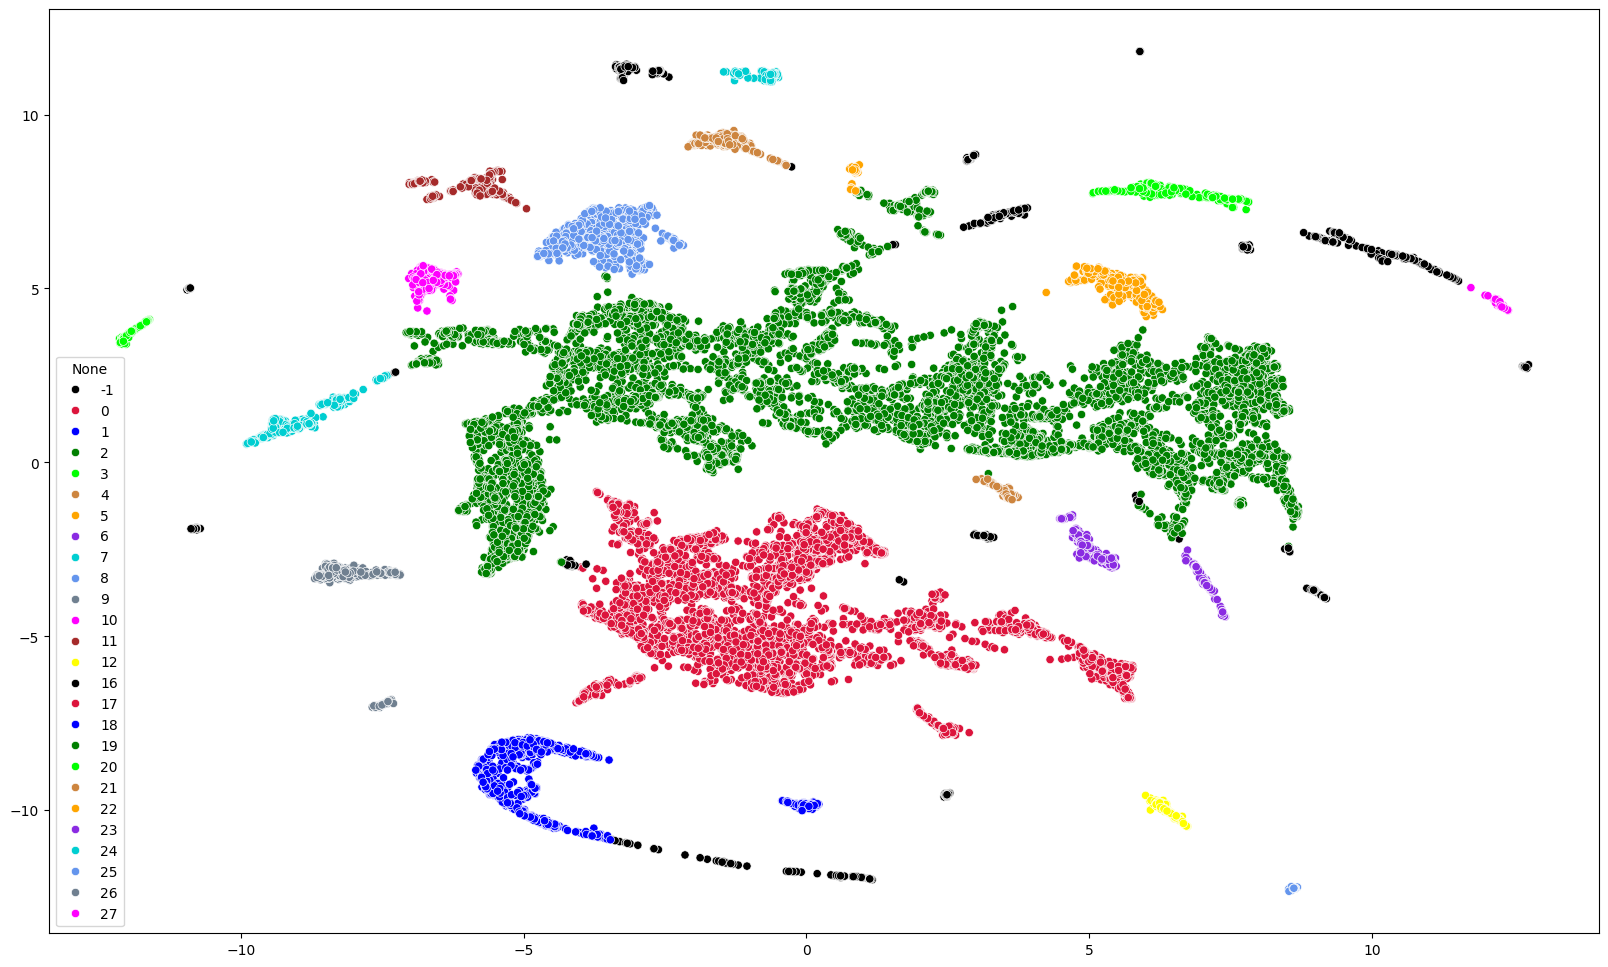

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=cluster_labels, palette=colors)
plt.show()